<a href="https://colab.research.google.com/github/yenlung/AI-Demo/blob/master/%E8%88%87_AI_PK_IVE_%E5%9C%98%E5%93%A1%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 安裝 `deepface` 套件

In [3]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 10.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=64d7cc66fb433cf21ab161c16862bb211c03803ed9fe851f88cb8acef57a1922
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


展示的時候, 我們使用 `gradio`。

In [4]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 9.7 MB/s eta 0

### 2. 準備放照片的資料夾

In [5]:
from deepface import DeepFace
from PIL import Image
import gradio as gr
import os

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


IVE 全員名單, 要做其他的請做相應的更改。

In [6]:
ive_members = ["兪真유진", "員瑛원영", "秋天가을", "Liz리즈", "Rei레이", "李瑞이서"]

我們準備在 `IVE` 下為每一位成員做一個資料夾。「訓練資料」的照片直接放入, 對應某位成員的子資料夾就可以了。

另外 `IVE_quiz` 資料夾是放準備考試用的照片。

In [7]:
IVE_folder = "/content/IVE"
IVE_quiz = "/content/IVE_quiz"

建立 `IVE` 和 `IVE_folder` 資料夾。

In [8]:
path = IVE_folder
if not os.path.exists(path):
    os.makedirs(path)

path = IVE_quiz
if not os.path.exists(path):
    os.makedirs(path)

在 `IVE` 資料夾下為每位成員做一個資料夾。

In [9]:
for ive in ive_members:
    path = IVE_folder + "/" + ive
    if not os.path.exists(path):
        os.makedirs(path)

簡單秀圖小函式。

In [10]:
def show_image(*args):
    k = len(args)
    fig = plt.figure(figsize=(5*k, 5))
    for i, photo in enumerate(args):
        plt.subplot(1,k,i+1)
        plt.axis('off')
        plt.axis('equal')
        img = Image.open(photo)
        plt.imshow(img)

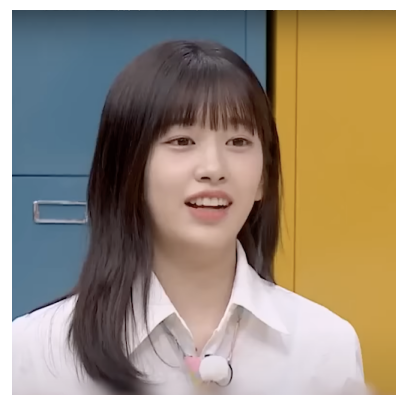

In [11]:
img_path = "/content/IVE/兪真유진/yujin.png"
show_image(img_path)

### 3. 找張照片試試

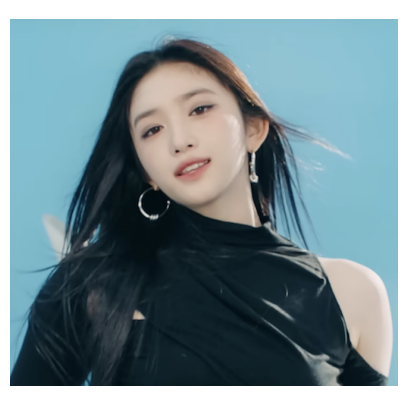

In [17]:
quiz_path = "/content/IVE_quiz/q1.png"
show_image(quiz_path)

這裡會把一張照片, 去和 `db_path` 資料夾下所有照片比對, 看最像誰。

In [18]:
df = DeepFace.find(quiz_path, db_path=IVE_folder,
                   enforce_detection=False)

There are  6  representations found in  representations_vgg_face.pkl
find function lasts  0.18759989738464355  seconds


In [19]:
df

[                             identity  source_x  source_y  source_w  source_h  \
 0  /content/IVE/員瑛원영/wonyoung.png       134        59       181       181   
 1      /content/IVE/秋天가을/gaeul.png       134        59       181       181   
 2      /content/IVE/兪真유진/yujin.png       134        59       181       181   
 3        /content/IVE/Rei레이/rei.png       134        59       181       181   
 4        /content/IVE/Liz리즈/liz.png       134        59       181       181   
 5      /content/IVE/李瑞이서/leeseo.png       134        59       181       181   
 
    VGG-Face_cosine  
 0         0.127573  
 1         0.135122  
 2         0.155694  
 3         0.234794  
 4         0.257794  
 5         0.382818  ]

直接看最像是誰 (我們是找出最像那張照片所在的資料夾)。

In [22]:
df[0].identity[0].split('/')[-2]

'員瑛원영'

### 4. 用 `gradio` 打造出 web app

In [24]:
def ive_pk(img, name):
    df = DeepFace.find(img, db_path=IVE_folder,
                       enforce_detection=False)
    try:
        result = df[0].identity[0].split('/')[-2]
    except:
        result = "我不知道"
    return result

In [25]:
inp1 = gr.Image(label="QUIZ", type="filepath")
inp2 = gr.Dropdown(
            ive_members,
            label="你的答案:"
        )
out = gr.Text(label="我的答案:")

In [26]:
iface = gr.Interface(ive_pk,
                     inputs=[inp1, inp2],
                     outputs=out,
                     title="IVE 成員 PK 戰",
                     description="和 AI PK IVE 成員的辨識能力")

In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://0ae3c6031dca8d96d1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


There are  6  representations found in  representations_vgg_face.pkl
find function lasts  0.3345775604248047  seconds
There are  6  representations found in  representations_vgg_face.pkl
find function lasts  0.17978334426879883  seconds
There are  6  representations found in  representations_vgg_face.pkl
find function lasts  0.19989252090454102  seconds
There are  6  representations found in  representations_vgg_face.pkl
find function lasts  0.1879713535308838  seconds
There are  6  representations found in  representations_vgg_face.pkl
find function lasts  0.18973398208618164  seconds
There are  6  representations found in  representations_vgg_face.pkl
find function lasts  0.21816802024841309  seconds
There are  6  representations found in  representations_vgg_face.pkl
find function lasts  0.18874382972717285  seconds
There are  6  representations found in  representations_vgg_face.pkl
find function lasts  0.20789432525634766  seconds
There are  6  representations found in  representa